In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('classification_dataset.csv')
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,-0.038769,-0.649239,-0.224746,-1.346275,0.126879,0
1,1.005284,-1.373239,1.157346,0.126493,1.422799,0
2,-0.742455,-0.573257,1.688442,-2.588237,0.762562,0
3,-1.587158,1.758582,-0.930664,0.764614,2.415399,1
4,0.195806,-0.058897,-0.549360,0.777375,1.147261,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Feature_3  1000 non-null   float64
 3   Feature_4  1000 non-null   float64
 4   Feature_5  1000 non-null   float64
 5   Target     1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [ ]:
data.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.357854,-0.501864,0.008598,0.009486,0.482060,0.498000
std,1.044406,1.249826,0.994725,1.198626,1.284559,0.500246
min,-3.216725,-3.837231,-2.899894,-3.950596,-3.778978,0.000000
25%,-0.340829,-1.311925,-0.657088,-0.953959,-0.199755,0.000000
50%,0.365388,-0.725516,-0.013428,0.207400,0.620635,0.000000
75%,1.007938,0.268259,0.699461,0.956974,1.371884,1.000000
max,3.591493,4.619524,2.765980,2.860860,3.841188,1.000000


**Splitting Data**

In [ ]:
X= data.drop('Target',axis=1)
y= data['Target']
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,-0.038769,-0.649239,-0.224746,-1.346275,0.126879
1,1.005284,-1.373239,1.157346,0.126493,1.422799
2,-0.742455,-0.573257,1.688442,-2.588237,0.762562
3,-1.587158,1.758582,-0.930664,0.764614,2.415399
4,0.195806,-0.058897,-0.549360,0.777375,1.147261


In [ ]:
y.head()

,Target
0,0
1,0
2,0
3,1
4,1


# Splitting data to train and test



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((700, 5), (300, 5), (700,), (300,))

# **K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
KNN_pred = KNN.predict(X_test)
pd.DataFrame(KNN_pred).head()

,0
0,0
1,1
2,0
3,1
4,0


In [ ]:
print(accuracy_score(y_test, KNN_pred))

0.9466666666666667


In [ ]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       144
           1       0.94      0.96      0.95       156

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
print(confusion_matrix(y_test, KNN_pred))

[[135   9]
 [  7 149]]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

KNN_y_prob = KNN.predict_proba(X_test)[:, 1]

# Calcuate the AUC Score
auc = roc_auc_score(y_test, KNN_y_prob)
print("AUC Score:", auc)

AUC Score: 0.9728899572649573


Text(0, 0.5, 'True Positive Rate')

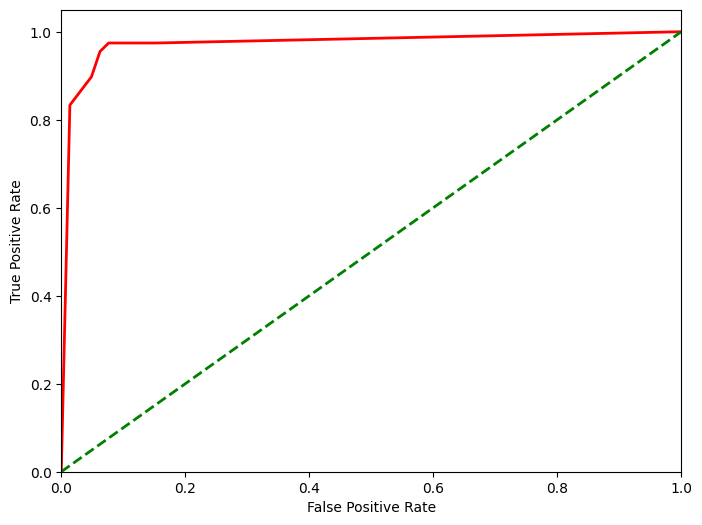

In [ ]:
# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, KNN_y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='green', lw= 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# **Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Svc= SVC(kernel='linear',probability=True, C=1.0)
Svc.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [ ]:
Svc_y_pred = Svc.predict(X_test)
pd.DataFrame(Svc_y_pred).head()

,0
0,0
1,1
2,0
3,1
4,0


In [ ]:
print(accuracy_score(y_test, Svc_y_pred))

0.91


In [ ]:
print(classification_report(y_test, Svc_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       144
           1       0.94      0.88      0.91       156

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [ ]:
print(confusion_matrix(y_test, Svc_y_pred))

[[136   8]
 [ 19 137]]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

Svc_y_prob = Svc.predict_proba(X_test)[:, 1]

# Calcuate the AUC Score
auc = roc_auc_score(y_test, Svc_y_prob)
print("AUC Score:", auc)

AUC Score: 0.9568643162393162


Text(0, 0.5, 'True Positive Rate')

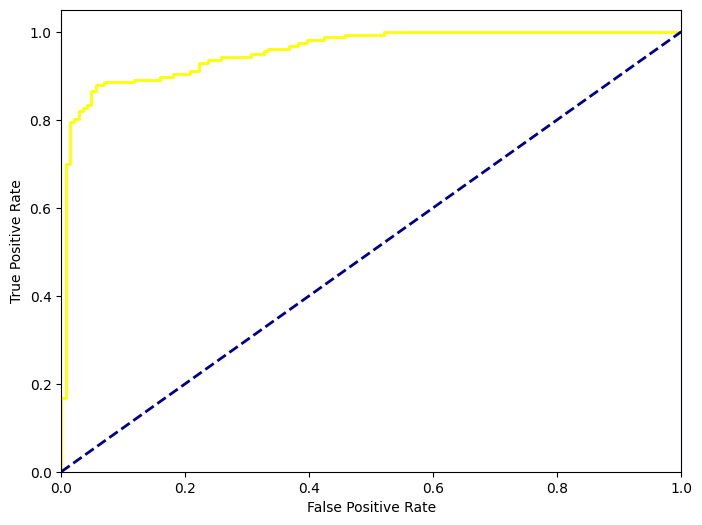

In [ ]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, Svc_y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='yellow', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='darkblue', lw= 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Dtc= DecisionTreeClassifier(criterion='gini',random_state=42)
Dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
Dtc_y_pred = Dtc.predict(X_test)
pd.DataFrame(Dtc_y_pred).head()

,0
0,0
1,1
2,0
3,1
4,0


In [ ]:
print(accuracy_score(y_test, Dtc_y_pred))

0.9433333333333334


In [ ]:
print(classification_report(y_test, Dtc_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       144
           1       0.94      0.95      0.95       156

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
print(confusion_matrix(y_test, Dtc_y_pred))

[[135   9]
 [  8 148]]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

Dtc_y_prob = Dtc.predict_proba(X_test)[:, 1]

# Calcuate the AUC Score
auc = roc_auc_score(y_test, Dtc_y_prob)
print("AUC Score:", auc)

AUC Score: 0.9431089743589743


Text(0, 0.5, 'True Positive Rate')

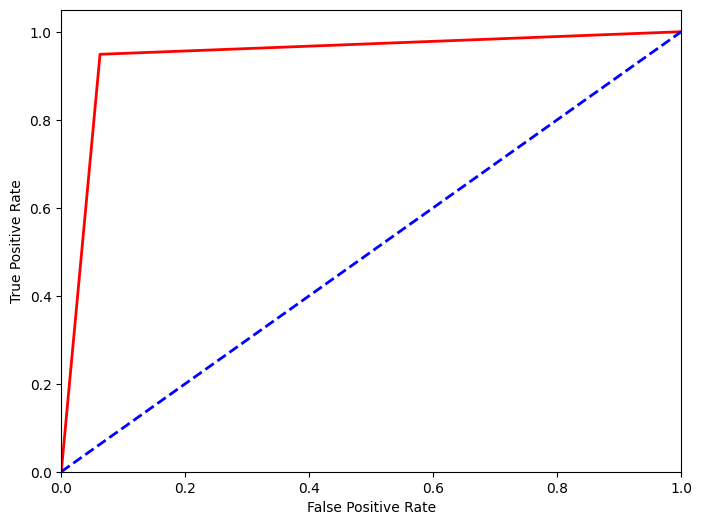

In [ ]:
# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, Dtc_y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='blue', lw= 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# **XG BOOST**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
 #Convert the data to DMatrix format (preferred format for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# Set up XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 4,
    'eta': 0.1,
    'seed': 42
}

# **HYPER-PARAMETER TUNNING**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Parameter grid for random search
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization
    'C': np.logspace(-4, 4, 20),                # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],   # Solvers compatible with Logistic Regression
    'max_iter': [50,100, 200, 500]            # Maximum number of iterations
}

In [ ]:
# Create the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_grid,
    n_iter=200,  # Number of random samples
    scoring='accuracy',  # Metric for optimization
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all processors
)

In [ ]:
# Fit random search to the training data
random_search.fit(X_train, y_train)
# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)


Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 50, 'C': 0.012742749857031334}
Best Cross-Validation Accuracy: 0.9157142857142857


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
420 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1203, in fit
    raise ValueError("l1_ratio must be specified when penalty is elasticn

In [ ]:
# Evaluate the optimized model on the test set
best_lr_model = random_search.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Confusion Matrix:
[[138   6]
 [ 19 137]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       144
           1       0.96      0.88      0.92       156

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



***Using the Randomized Search CV on Random Forest Classifier***

In [ ]:
# Parameter grid for random search
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                 # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                   # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2', None],          # Number of features to consider at each split
    'class_weight': ['balanced', 'balanced_subsample'] # Class weight strategies
}

In [ ]:
# Create the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
# RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=100,  # Number of random samples
    scoring='accuracy',  # Metric for optimization
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all processors
)

In [ ]:
# Fit random search to the training data
random_search_rf.fit(X_train, y_train)
# Print the best parameters and best score
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", random_search_rf.best_score_)

Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced_subsample'}
Best Cross-Validation Accuracy: 0.9528571428571428


In [ ]:
# Evaluate the optimized Random Forest model on the test set
best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix for Random Forest:
[[137   7]
 [  9 147]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       144
           1       0.95      0.94      0.95       156

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



 **Using Grid Search CV on KNN**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_neighbors': [10,15,22,25,27,30],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan','minkowski'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,20,30,40,50],
    'p':[1,2]

}

In [ ]:
grid_search = GridSearchCV(
    estimator=KNN,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train, y_train)
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9571428571428571


In [ ]:
# Evaluate the optimized  Grid Search CV model on the test set
best_GS_model = grid_search.best_estimator_
y_pred_GS= best_GS_model.predict(X_test)
print("Confusion Matrix for Grid Search :")
print(confusion_matrix(y_test, y_pred_GS))
print("\nClassification Report for Grid Search :")
print(classification_report(y_test, y_pred_GS))

Confusion Matrix for Grid Search :
[[138   6]
 [  6 150]]

Classification Report for Grid Search :
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       144
           1       0.96      0.96      0.96       156

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



**Using Grid Search CV on SVM**



In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4],
}


In [ ]:
grid_search = GridSearchCV(
    estimator=Svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)



In [ ]:
grid_search.fit(X_train, y_train)
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9528571428571428


In [ ]:
# Evaluate the optimized  Grid Search CV model on the test set
best_GS_model = grid_search.best_estimator_
y_pred_GS= best_GS_model.predict(X_test)
print("Confusion Matrix for Grid Search :")
print(confusion_matrix(y_test, y_pred_GS))
print("\nClassification Report for Grid Search :")
print(classification_report(y_test, y_pred_GS))

Confusion Matrix for Grid Search :
[[133  11]
 [  9 147]]

Classification Report for Grid Search :
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       144
           1       0.93      0.94      0.94       156

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

